# Group Project For ASTR 19

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt

In [3]:
seed = 42
np.random.seed(42)

In [4]:
data = ascii.read('Data/UID_0043587_RVC_008.tbl.txt')
data

HJD,Radial_Velocity,Radial_Velocity_Uncertainty
days,m / s,m / s
float64,float64,float64
2449676.0632,131.910003662,4.8400002
2449767.77441,22.6000003815,2.5699999
2449768.83203,-5.48999977112,2.6800001
2449793.79785,107.309997559,1.52
2450056.98828,116.669998169,1.6199999
2450087.88184,77.2600021362,2.1600001
2450088.91894,32.5999984741,1.64
2450089.00586,33.7299995422,1.5599999


In [5]:
print(data.columns)
print(data.colnames)
print(data.meta)
print(len(data))

<TableColumns names=('HJD','Radial_Velocity','Radial_Velocity_Uncertainty')>
['HJD', 'Radial_Velocity', 'Radial_Velocity_Uncertainty']
OrderedDict([('comments', []), ('keywords', OrderedDict([('STAR_ID', {'value': 'HD 75732'}), ('DATA_CATEGORY', {'value': 'Planet Radial Velocity Curve'}), ('NUMBER_OF_POINTS', {'value': '274'}), ('TIME_REFERENCE_FRAME', {'value': 'HJD'}), ('MINIMUM_DATE', {'value': '2449676.0632'}), ('DATE_UNITS', {'value': 'days'}), ('MAXIMUM_DATE', {'value': '2455603.80404'}), ('MINIMUM_VALUE', {'value': '-130.570007324'}), ('VALUE_UNITS', {'value': 'm/s'}), ('MAXIMUM_VALUE', {'value': '141.460006714'}), ('REFERENCE', {'value': 'Howard & Fulton, 2016'}), ('BIBCODE', {'value': '2016arXiv160603134H'}), ('TELESCOPE', {'value': '3.0m Shane'}), ('INSTRUMENT', {'value': 'l: Hamilton Spectrograph post-dewar 16 (after November 1994)'}), ('WAVELENGTH_CALIBRATION_TECHNIQUE', {'value': 'Iodine'}), ('OBSERVATORY_SITE', {'value': 'Lick Observatory, California'}), ('COLUMN_RADIAL_V

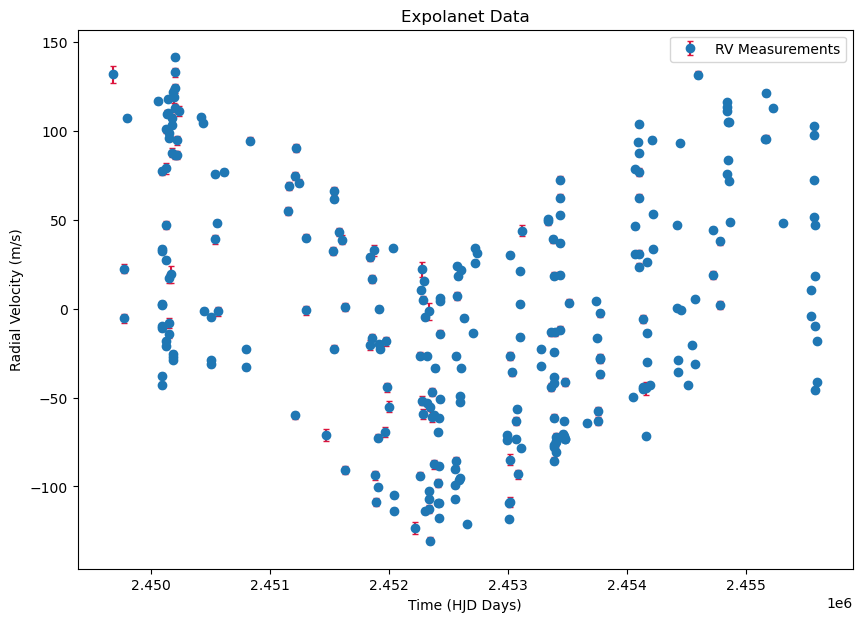

In [6]:
hjd = data.columns["HJD"]
radial_velocity = data.columns["Radial_Velocity"]
uncertainty = data.columns["Radial_Velocity_Uncertainty"]

plt.figure(figsize=(10, 7))
plt.errorbar(x=hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

plt.title("Expolanet Data")
plt.xlabel("Time (HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()

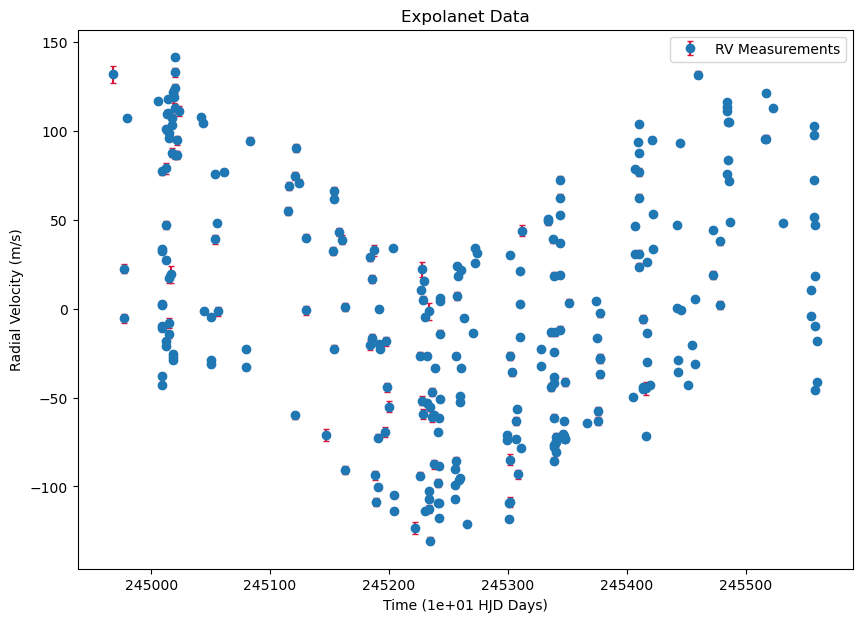

In [7]:
hjd = data.columns["HJD"]
radial_velocity = data.columns["Radial_Velocity"]
uncertainty = data.columns["Radial_Velocity_Uncertainty"]

scalar = 1e1
scaled_hjd = hjd / scalar

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

plt.title("Expolanet Data")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()

In [8]:
import numpy as np
from scipy import optimize

Fitted params: [ 4.79178271e+01  9.36575654e+03  4.80700695e+02 -1.41826367e+00]


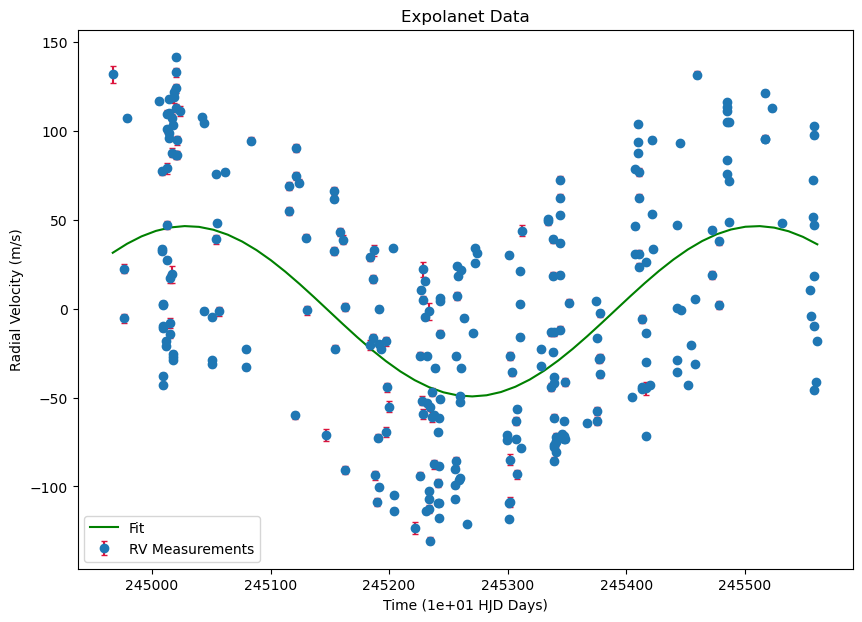

In [9]:
# define the model function we are trying to fit
# a: amplitude
# b: phase shift
# c: wavelength/period
# d: vertical shift
def f_curve(x, a, b, c, d):
    return a * np.sin(2.0*np.pi * (x - b) / c) + d

initial_guess = [45, 1, 500, 0]

# we can help scipy find the best fit value by providing the initial guess ourselves
# this worked but the parameters are not quite those expected
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, radial_velocity, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess)


params1 = params


print(f"Fitted params: {params}")

# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)))
y_fit = f_curve(x_fit, *params)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...'

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

Planet Detected: 55 Cnc d Planetary

$d: K ~45, P ~4820$

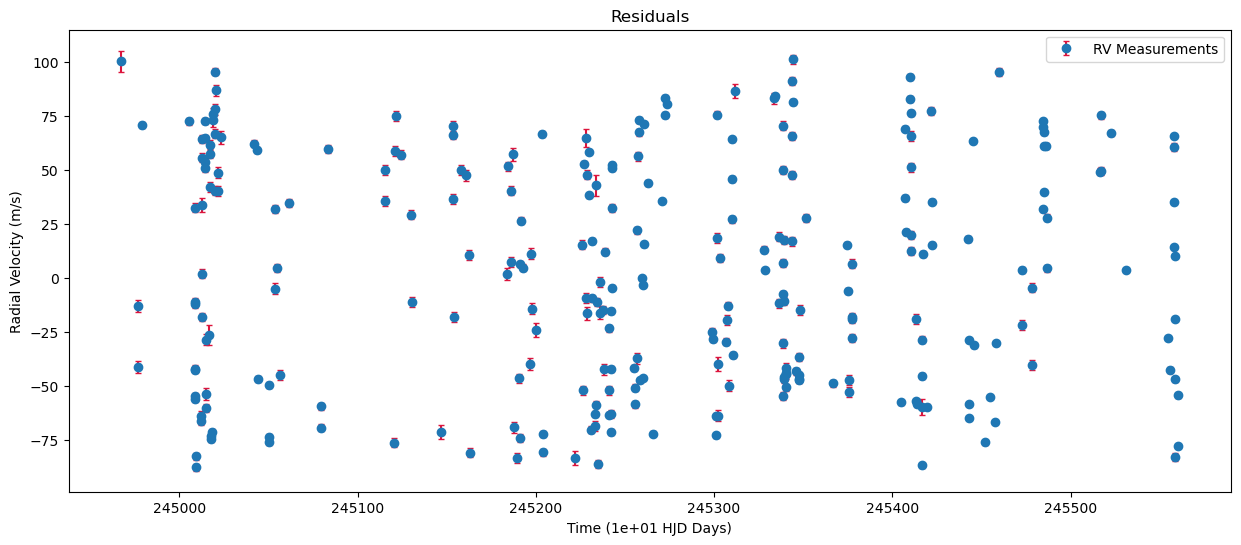

In [10]:
# calculate residuals
y_pred = f_curve(scaled_hjd, *params)
residuals = radial_velocity - y_pred

plt.figure(figsize=(15, 6))

# plot residuals
plt.errorbar(scaled_hjd, residuals, uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals")
plt.legend(frameon=True,fontsize=10,handletextpad=1)

plt.show()

In [11]:
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
residuals_rms = np.sqrt(np.mean(residuals**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.8499898224963913
Residuals stdev is 52.2120813133502395
Residuals RMS is   52.2120813133502395


In [12]:
residuals1 = residuals

Fitted params: [-1.64450385e+01 -1.37056892e+03  2.61453569e+01 -2.63861974e-01]


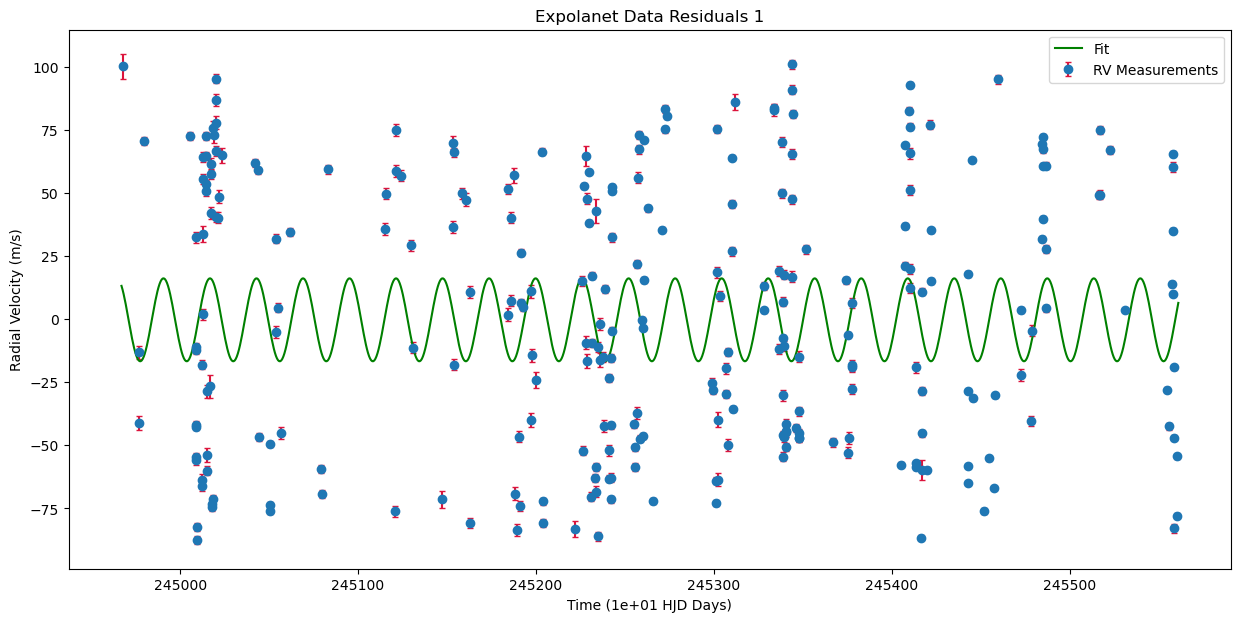

In [13]:
initial_guess = [5, 1, 26, 1]

# lower_bound = [20, -np.inf, 0, -np.inf]
# upper_bound = [30, np.inf, 10, np.inf]

#curve fit
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, residuals1, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess,
                                        # bounds = (lower_bound, upper_bound)
                                        )

params2 = params
    
print(f"Fitted params: {params}")

# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = f_curve(x_fit, *params)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=residuals1, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 1")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

26.145356941385078


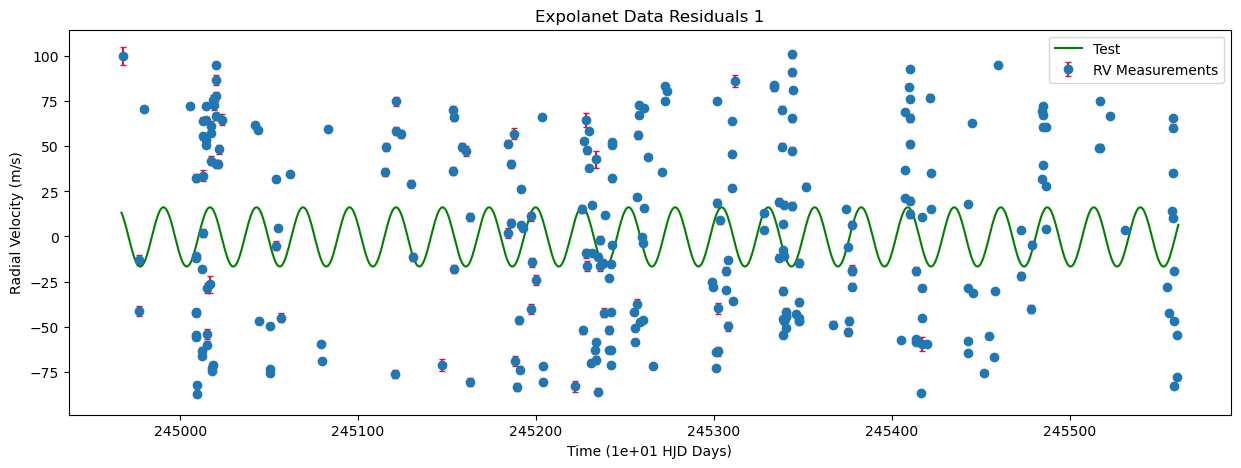

In [14]:
y_test = f_curve(x_fit, params2[0], params2[1], params2[2], params2[3])

print(params2[2])

plt.figure(figsize=(15, 5))
plt.errorbar(x=scaled_hjd, y=residuals1, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_test, 'g-', label='Test')
plt.title("Expolanet Data Residuals 1")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

Initial params: [-1.64450385e+01 -1.37056892e+03  2.61453569e+01 -2.63861974e-01]


interactive(children=(FloatSlider(value=-16.44503845693848, description='a', max=83.55496154306152, min=-116.4…

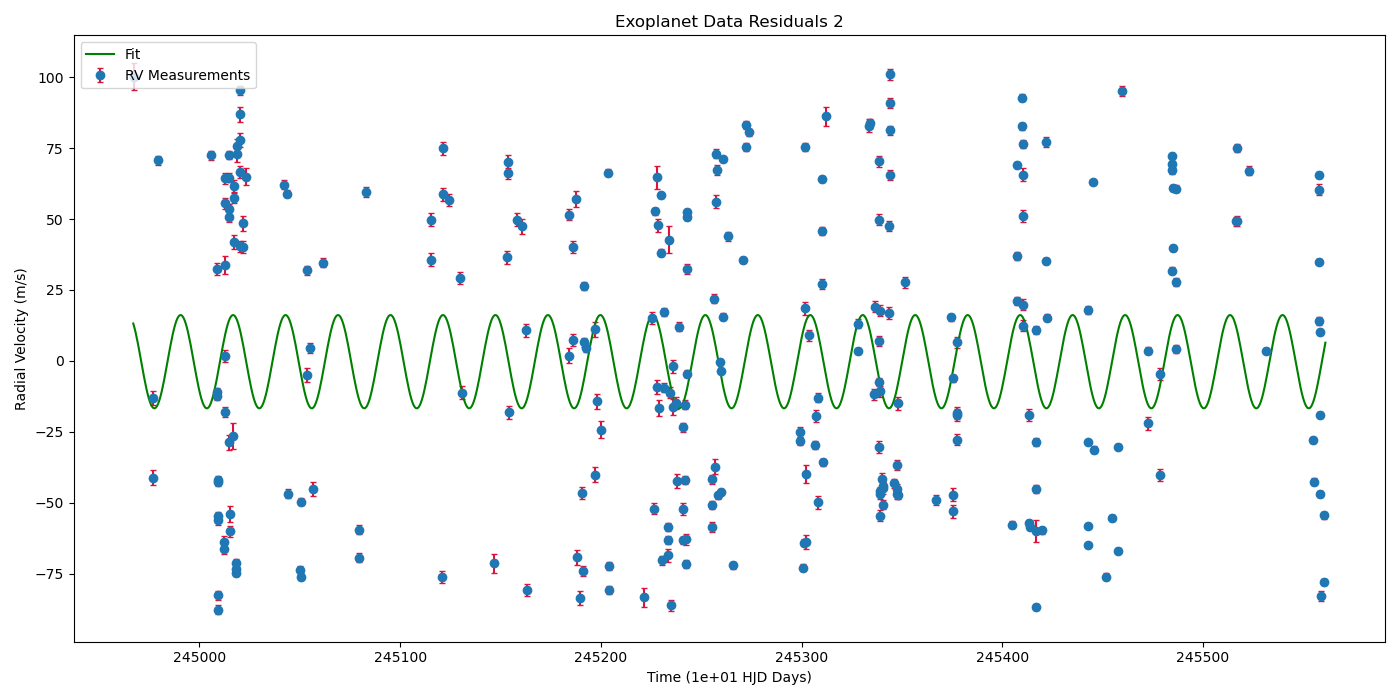

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib widget

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

# Initial plot
ax.errorbar(x=scaled_hjd, y=residuals1, yerr=uncertainty,
            fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

# Initial line
line1, = ax.plot(x_fit, y_fit, 'g-', label='Fit')

ax.set_title("Exoplanet Data Residuals 2")
ax.set_xlabel(f"Time ({scalar:.0e} HJD Days)")
ax.set_ylabel("Radial Velocity (m/s)")
ax.legend(frameon=True, loc='upper left')
plt.tight_layout()

# Print the parameters (assumed to be a list or array of 4 floats)
print("Initial params:", params2)

# Define the update function that takes all 4 parameters as input
def update(a, b, c, d):
    y = f_curve(x_fit, a, b, c, d)
    line1.set_data(x_fit, y)
    fig.canvas.draw_idle()

# Create sliders ±100 around each param
sliders = {
    'a': widgets.FloatSlider(value=params2[0], min=params2[0]-100, max=params2[0]+100, step=1, description='a'),
    'b': widgets.FloatSlider(value=params2[1], min=params2[1]-100, max=params2[1]+100, step=0.1, description='b'),
    'c': widgets.FloatSlider(value=params2[2], min=params2[2]-100, max=params2[2]+100, step=0.1, description='c'),
    'd': widgets.FloatSlider(value=params2[3], min=params2[3]-100, max=params2[3]+100, step=1, description='d'),
}


out = widgets.interactive(update, a=sliders['a'], b=sliders['b'], c=sliders['c'], d=sliders['d'])

# Display everything
display(out)

In [16]:
%matplotlib inline

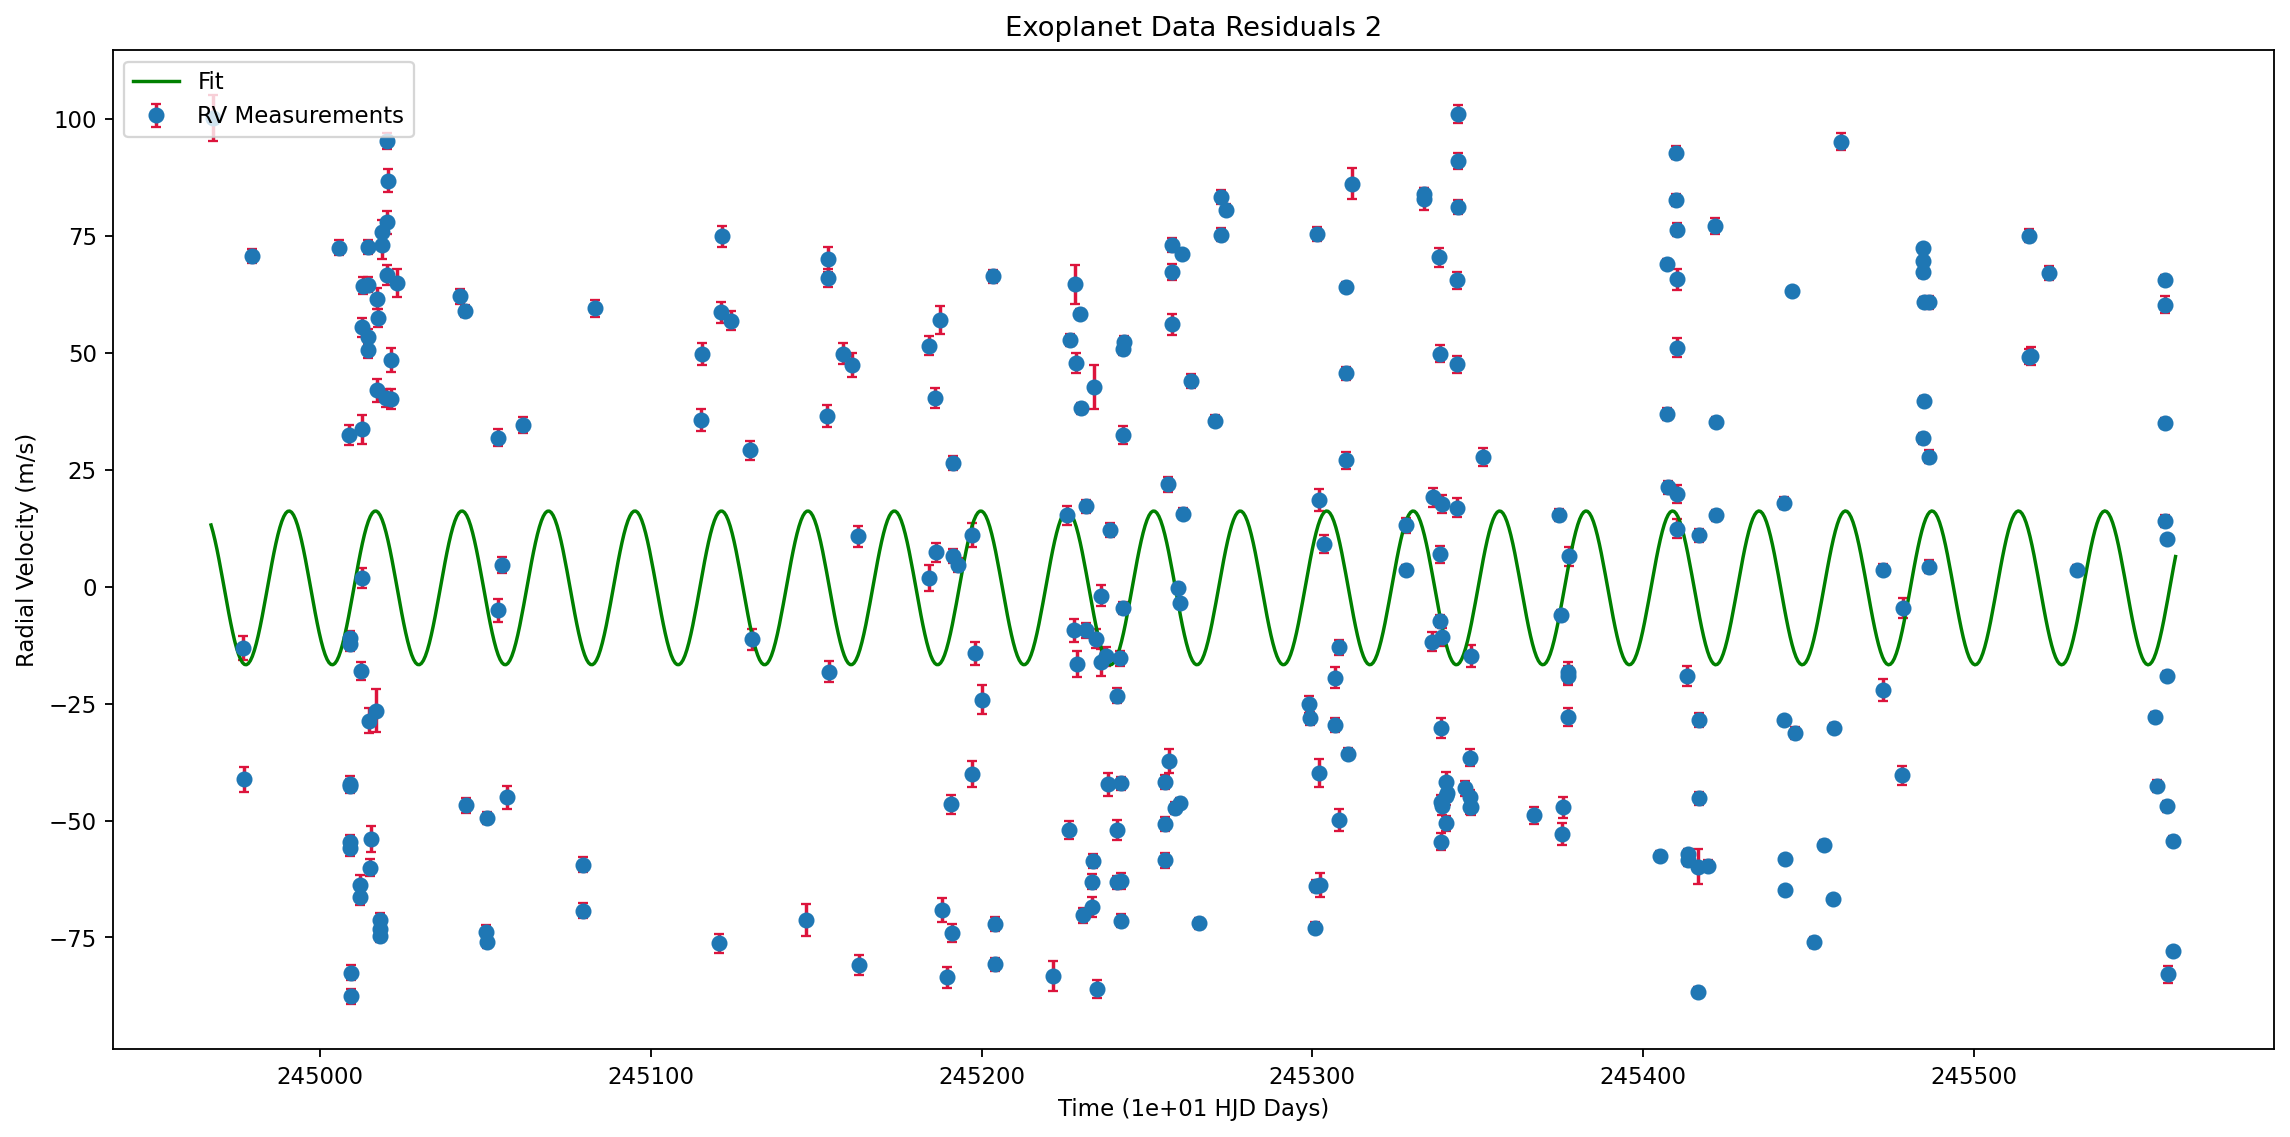

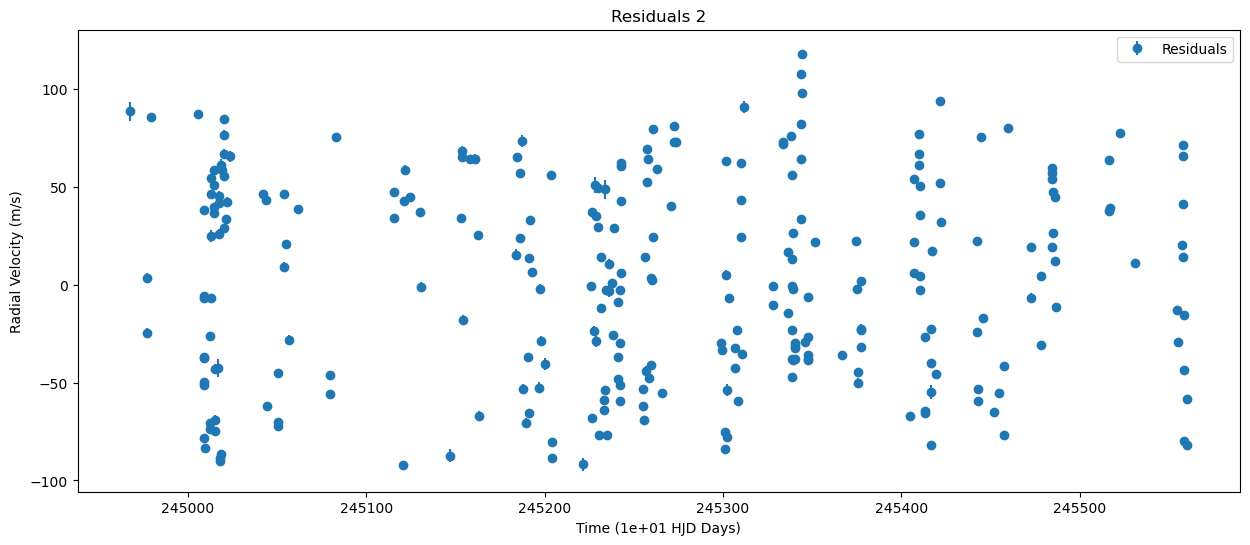

In [17]:
# calculate residual2
y_pred = f_curve(scaled_hjd, *params2)
residuals2 = residuals1 - y_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, residuals2, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals 2")
plt.legend()
plt.show()

In [18]:
residuals_mean = np.mean(residuals2)
residuals_std = np.std(residuals2)
residuals_rms = np.sqrt(np.mean(residuals2**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.5902884617377790
Residuals stdev is 51.2426306554380204
Residuals RMS is   51.2426306554380204


## Testing Sinusoid Sum

In [19]:
def two_sum(x, a1, b1, c1, d1, a2, b2, c2, d2):
    sin1 = f_curve(x, a1, b1, c1, d1)
    sin2 = f_curve(x, a2, b2, c2, d2)
    return sin1 + sin2

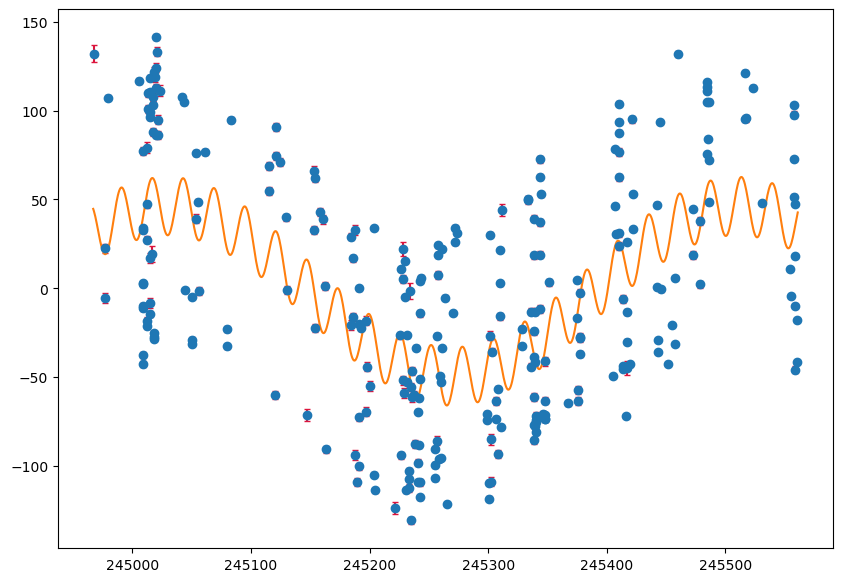

In [20]:
plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty,
            fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, two_sum(x_fit,
                            params1[0],
                            params1[1],
                            params1[2],
                            params1[3], 
                            params2[0],
                            params2[1],
                            params2[2],
                            params2[3], 
                            ))
plt.show()

In [21]:
final_initial_guess = np.concatenate((params1, params2))
final_initial_guess

array([ 4.79178271e+01,  9.36575654e+03,  4.80700695e+02, -1.41826367e+00,
       -1.64450385e+01, -1.37056892e+03,  2.61453569e+01, -2.63861974e-01])

Fitted params: [ 4.60208815e+01  8.56893498e+03  4.82328123e+02  1.50648728e+06
 -1.68814496e+01 -1.48657688e+03  2.61576430e+01 -1.50648855e+06]


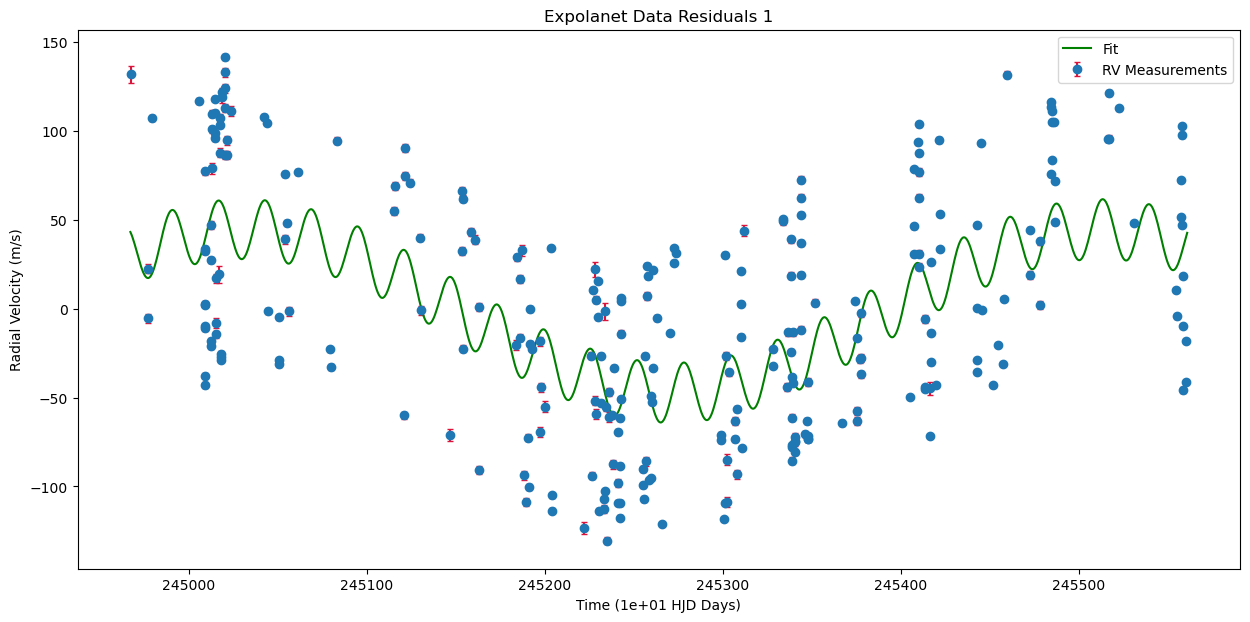

In [22]:
# initial_guess = [15, 1, 180, 1]

# lower_bound = [20, -np.inf, 0, -np.inf]
# upper_bound = [30, np.inf, 10, np.inf]

#curve fit
params, params_cov = optimize.curve_fit(two_sum, scaled_hjd, radial_velocity, sigma = uncertainty, absolute_sigma=True,
                                        p0=final_initial_guess,
                                        # bounds = (lower_bound, upper_bound)
                                        )
    
print(f"Fitted params: {params}")

# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = two_sum(x_fit, *params)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 1")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

## Back to more planets

Fitted params: [-1.41201535e+01  1.30174145e+03  4.37668002e+00 -2.71256691e-01]


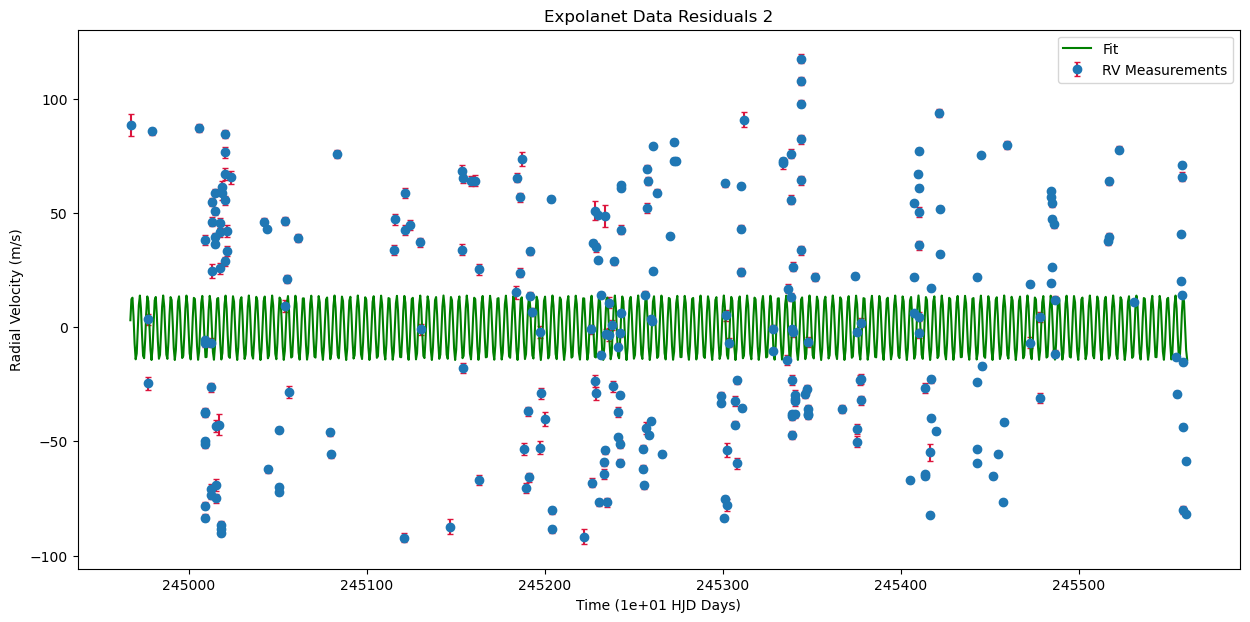

In [23]:
initial_guess = [10, 1, 4.4, 1]

# lower_bound = [100, -np.inf, -np.inf, -np.inf]
# upper_bound = [200, np.inf, np.inf, np.inf]

#curve fit
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, residuals2, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess,
                                        # bounds = (lower_bound, upper_bound)
                                        )
    
print(f"Fitted params: {params}")

params3 = params

# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = f_curve(x_fit, *params3)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=residuals2, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 2")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

Initial params: [-1.41201535e+01  1.30174145e+03  4.37668002e+00 -2.71256691e-01]


interactive(children=(FloatSlider(value=-14.120153513953538, description='a', max=85.87984648604646, min=-114.…

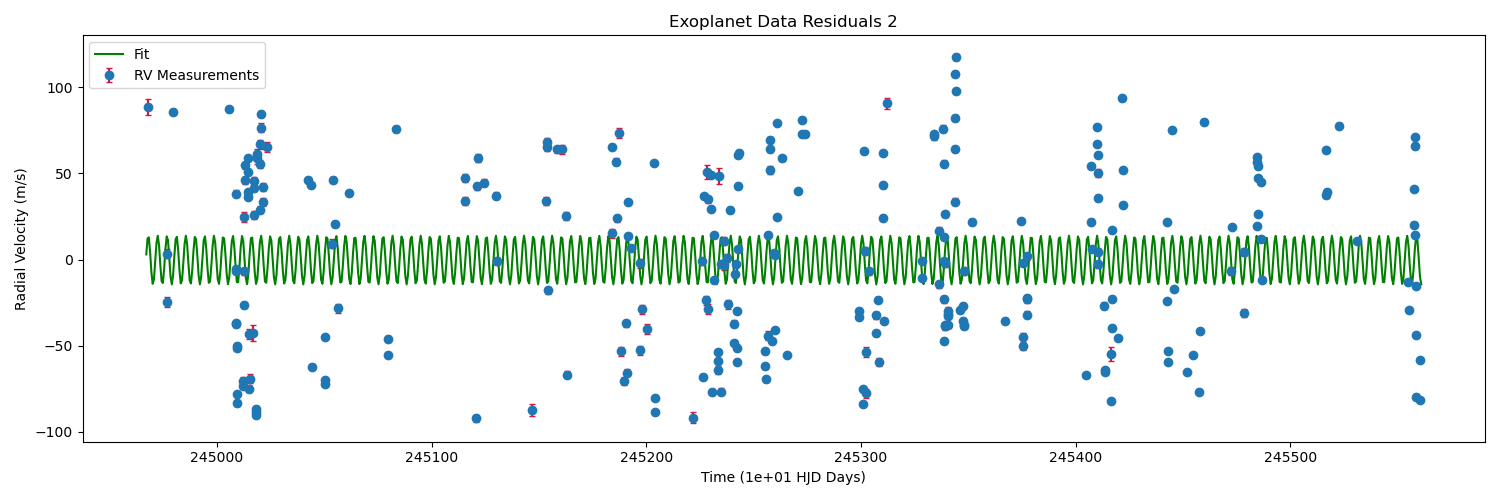

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib widget

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Initial plot
ax.errorbar(x=scaled_hjd, y=residuals2, yerr=uncertainty,
            fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

# Initial line
line1, = ax.plot(x_fit, y_fit, 'g-', label='Fit')

ax.set_title("Exoplanet Data Residuals 2")
ax.set_xlabel(f"Time ({scalar:.0e} HJD Days)")
ax.set_ylabel("Radial Velocity (m/s)")
ax.legend(frameon=True, loc='upper left')
plt.tight_layout()

# Print the parameters (assumed to be a list or array of 4 floats)
print("Initial params:", params3)

# Define the update function that takes all 4 parameters as input
def update(a, b, c, d):
    y = f_curve(x_fit, a, b, c, d)
    line1.set_data(x_fit, y)
    fig.canvas.draw_idle()

# Create sliders ±100 around each param
sliders = {
    'a': widgets.FloatSlider(value=params3[0], min=params3[0]-100, max=params3[0]+100, step=1, description='a'),
    'b': widgets.FloatSlider(value=params3[1], min=params3[1]-100, max=params3[1]+100, step=0.1, description='b'),
    'c': widgets.FloatSlider(value=params3[2], min=params3[2]-10, max=params3[2]+10, step=0.01, description='c'),
    'd': widgets.FloatSlider(value=params3[3], min=params3[3]-100, max=params3[3]+100, step=1, description='d'),
}


out = widgets.interactive(update, a=sliders['a'], b=sliders['b'], c=sliders['c'], d=sliders['d'])

# Display everything
display(out)

In [25]:
%matplotlib inline

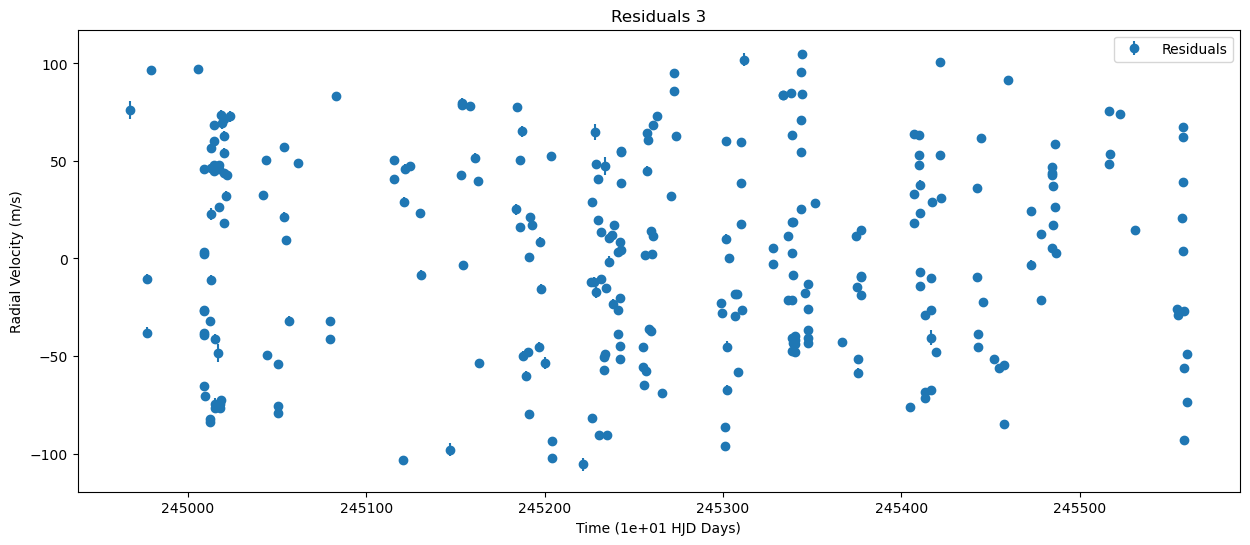

In [34]:
# calculate residual2
y_pred = f_curve(scaled_hjd, *params3)
residuals3 = residuals2 - y_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, residuals3, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals 3")
plt.legend(frameon=True,fontsize=10,handletextpad=1)

In [ ]:
residuals_mean = np.mean(residuals3)
residuals_std = np.std(residuals3)
residuals_rms = np.sqrt(np.mean(residuals3**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  2.0491879104735715
Residuals stdev is 51.3980819898499703
Residuals RMS is   51.3980819898499703


## Three Sum Test

In [28]:
def three_sum(x, a1, b1, c1, d1, a2, b2, c2, d2, a3, b3, c3, d3):
    sin1 = f_curve(x, a1, b1, c1, d1)
    sin2 = f_curve(x, a2, b2, c2, d2)
    sin3 = f_curve(x, a3, b3, c3, d3)
    return sin1 + sin2 + sin3

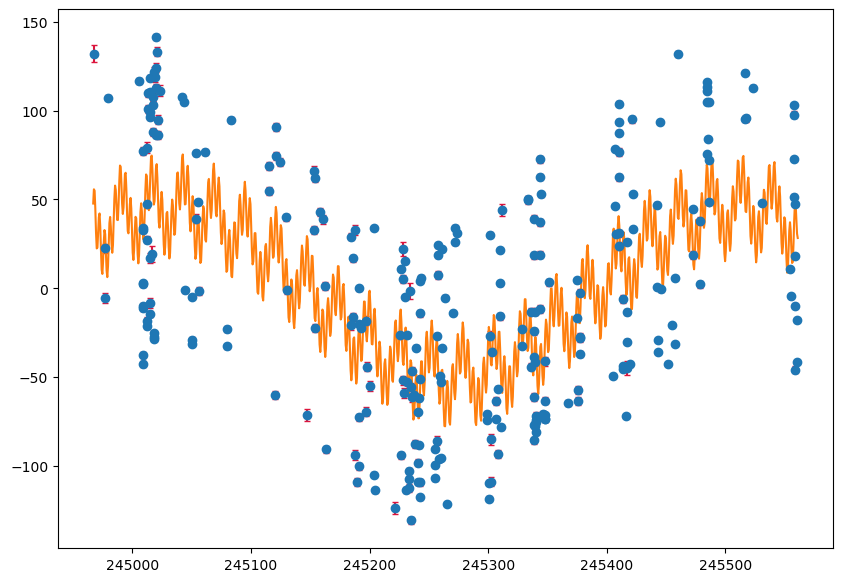

In [29]:
plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty,
            fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, three_sum(x_fit,
                            params1[0],
                            params1[1],
                            params1[2],
                            params1[3], 
                            params2[0],
                            params2[1],
                            params2[2],
                            params2[3], 
                            params3[0],
                            params3[1],
                            params3[2],
                            params3[3], 
                            ))
plt.show()

In [30]:
final_initial_guess = np.concatenate((params1, params2, params3))
final_initial_guess

array([ 4.79178271e+01,  9.36575654e+03,  4.80700695e+02, -1.41826367e+00,
       -1.64450385e+01, -1.37056892e+03,  2.61453569e+01, -2.63861974e-01,
       -1.41201535e+01,  1.30174145e+03,  4.37668002e+00, -2.71256691e-01])

Fitted params: [ 4.76062916e+01  6.30847602e+03  4.86934629e+02 -2.61126167e+06
 -1.73102641e+01 -3.02365173e+03  2.63205785e+01 -2.58339425e+06
 -1.52394182e+01  1.26394583e+03  4.37735742e+00  5.19465486e+06]


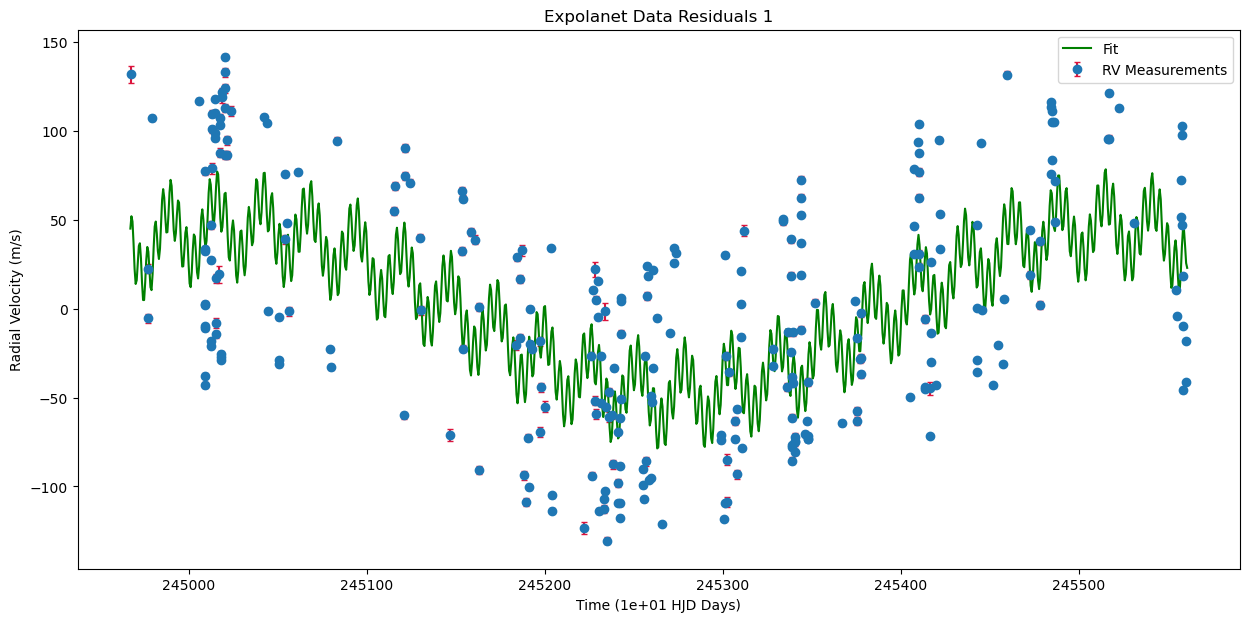

In [31]:
# initial_guess = [15, 1, 180, 1]

# lower_bound = [20, -np.inf, 0, -np.inf]
# upper_bound = [30, np.inf, 10, np.inf]

#curve fit
params, params_cov = optimize.curve_fit(three_sum, scaled_hjd, radial_velocity, sigma = uncertainty, absolute_sigma=True,
                                        p0=final_initial_guess,
                                        # bounds = (lower_bound, upper_bound)
                                        )
    
print(f"Fitted params: {params}")

# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = three_sum(x_fit, *params)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 1")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

### Try planets 4 and 5

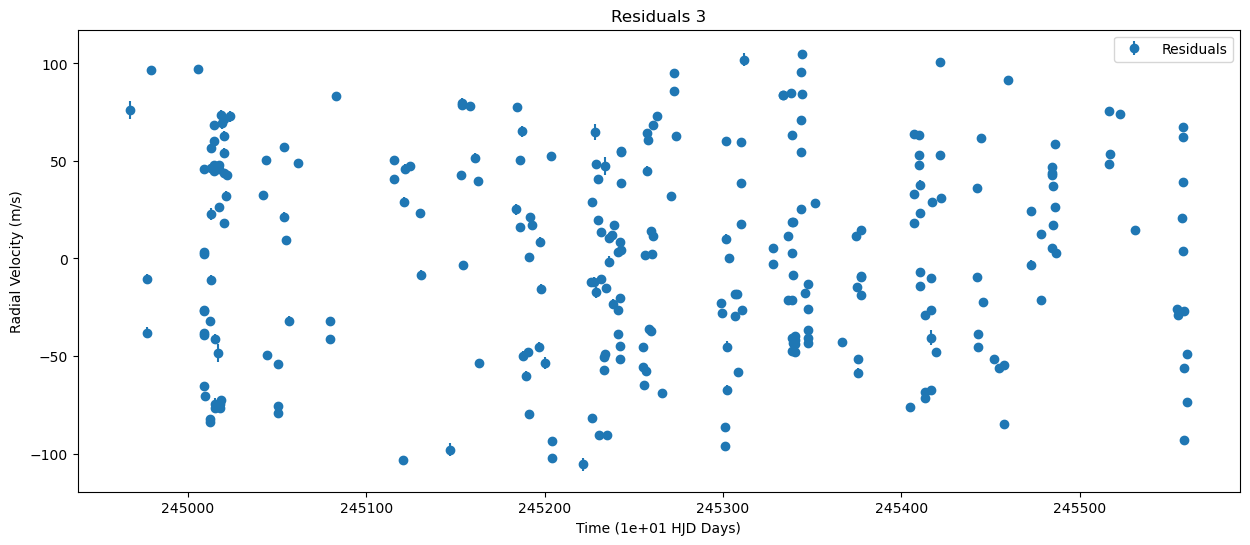

In [35]:
# calculate residual2
y_pred = f_curve(scaled_hjd, *params3)
residuals3 = residuals2 - y_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, residuals3, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals 3")
plt.legend(frameon=True,fontsize=10,handletextpad=1)

Fitted params: [-1.23231117e+01  1.82266498e+04  5.55410730e+01  1.60538108e+00]


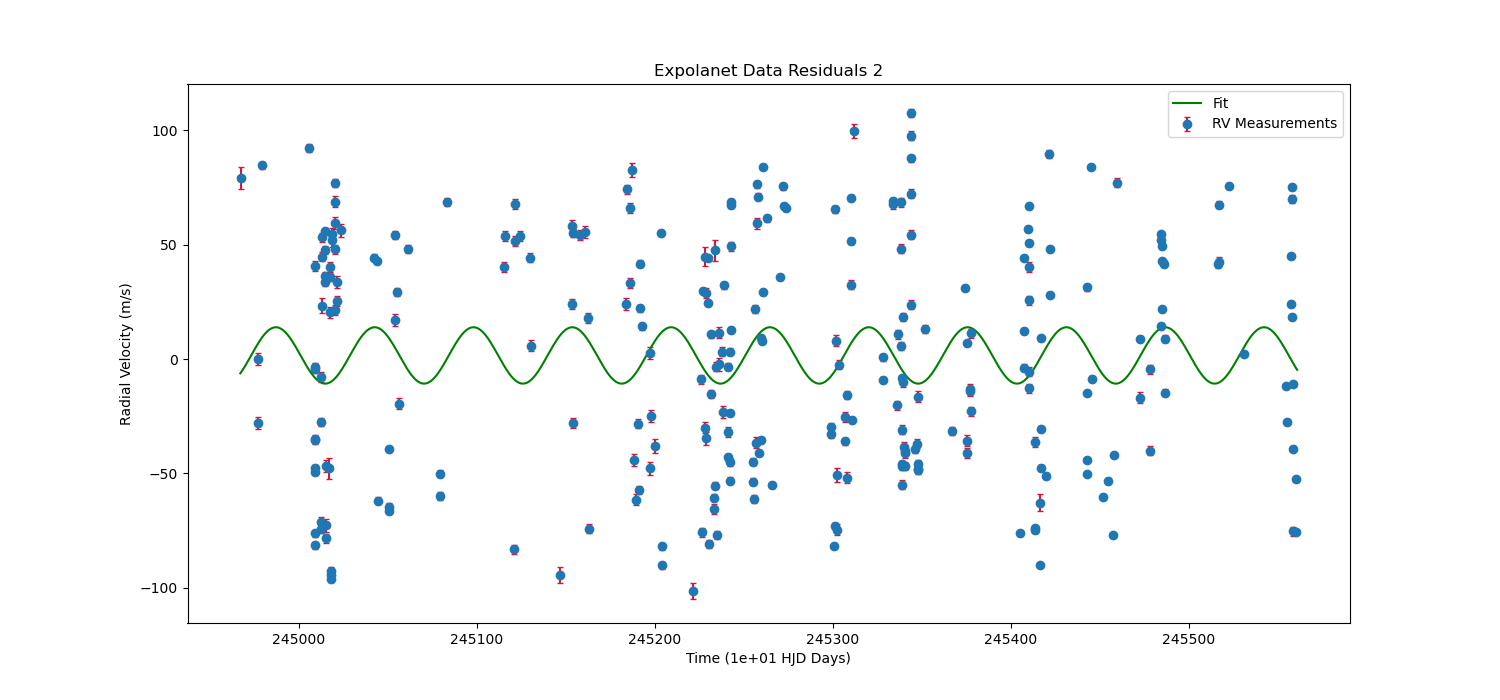

In [59]:
initial_guess = [71, 1, 60, 1]

#curve fit
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, residuals3, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess,
                                        )
    
print(f"Fitted params: {params}")

params4 = params

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = f_curve(x_fit, *params4)    
                                    

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=residuals3, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 2")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

Initial params: [-1.23231117e+01  1.82266498e+04  5.55410730e+01  1.60538108e+00]


interactive(children=(FloatSlider(value=-12.323111747722315, description='a', max=187.67688825227768, min=-112…

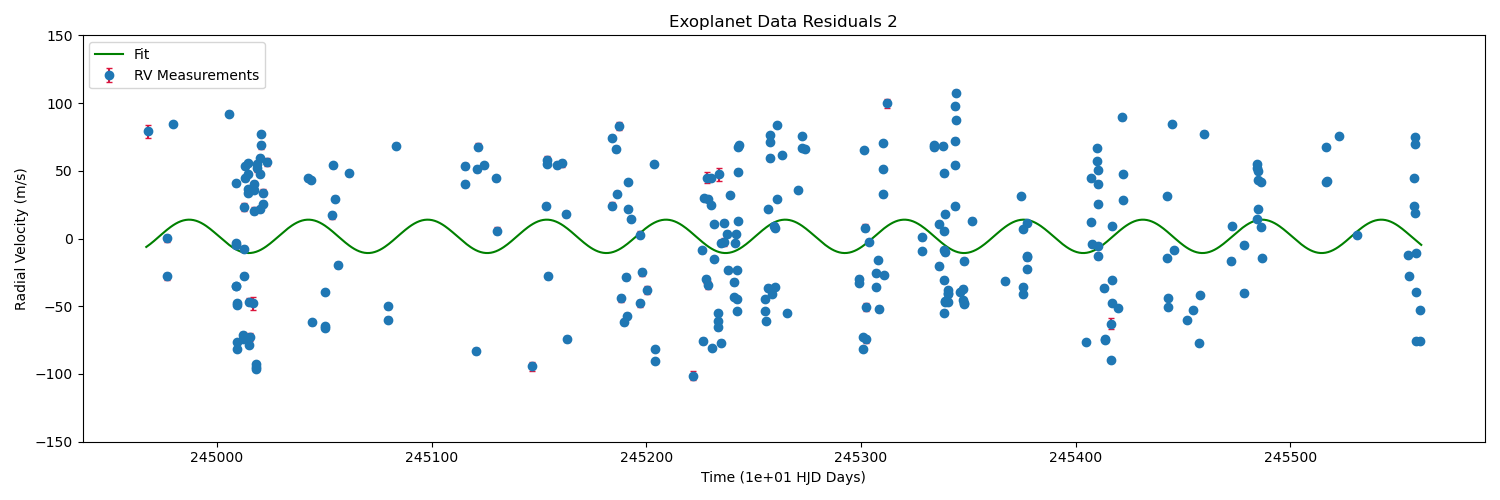

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib widget

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Initial plot
ax.errorbar(x=scaled_hjd, y=residuals3, yerr=uncertainty,
            fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

# Initial line
line1, = ax.plot(x_fit, y_fit, 'g-', label='Fit')

ax.set_title("Exoplanet Data Residuals 2")
ax.set_xlabel(f"Time ({scalar:.0e} HJD Days)")
ax.set_ylabel("Radial Velocity (m/s)")
ax.set_ylim(-150, 150)
ax.legend(frameon=True, loc='upper left')
plt.tight_layout()

# Print the parameters (assumed to be a list or array of 4 floats)
print("Initial params:", params4)

# Define the update function that takes all 4 parameters as input
def update(a, b, c, d):
    y = f_curve(x_fit, a, b, c, d)
    line1.set_data(x_fit, y)
    fig.canvas.draw_idle()

# Create sliders ±100 around each param
sliders = {
    'a': widgets.FloatSlider(value=params4[0], min=params4[0]-100, max=params4[0]+200, step=1, description='a'),
    'b': widgets.FloatSlider(value=params4[1], min=params4[1]-100, max=params4[1]+100, step=0.1, description='b'),
    'c': widgets.FloatSlider(value=params4[2], min=params4[2]-10, max=params4[2]+100, step=0.01, description='c'),
    'd': widgets.FloatSlider(value=params4[3], min=params4[3]-100, max=params4[3]+100, step=1, description='d'),
}


out = widgets.interactive(update, a=sliders['a'], b=sliders['b'], c=sliders['c'], d=sliders['d'])

# Display everything
display(out)

In [63]:
%matplotlib inline

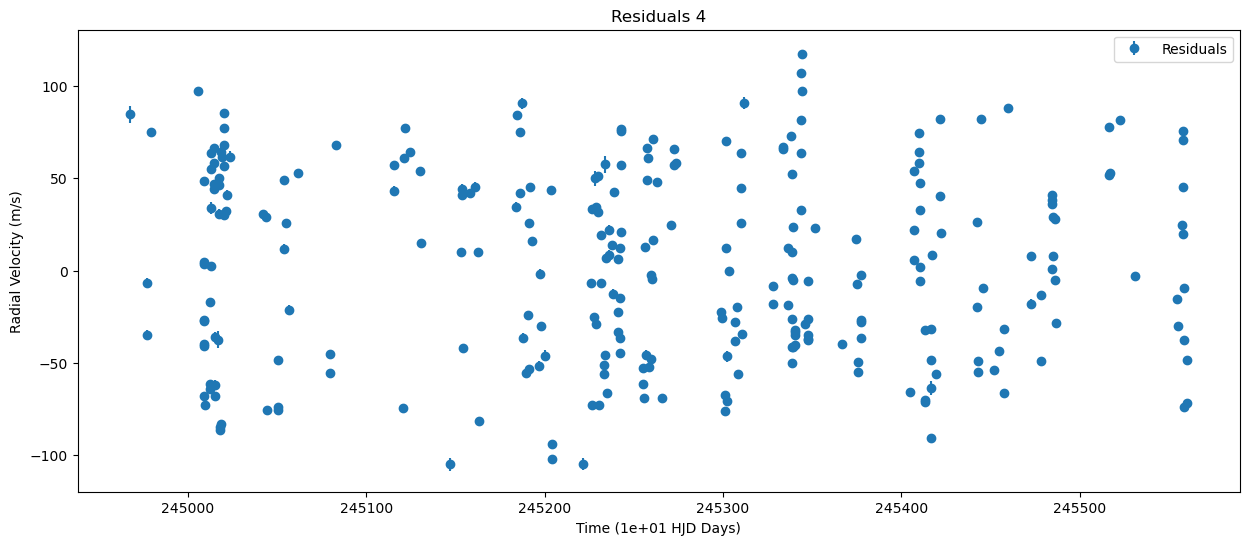

In [67]:
# calculate residual2
y_pred = f_curve(scaled_hjd, *params4)
residuals4 = residuals3 - y_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, residuals4, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals 4")
plt.legend(frameon=True,fontsize=10,handletextpad=1)
plt.show()

In [68]:
residuals_mean = np.mean(residuals4)
residuals_std = np.std(residuals4)
residuals_rms = np.sqrt(np.mean(residuals4**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  2.3701889857758691
Residuals stdev is 50.9076076297351037
Residuals RMS is   50.9076076297351037


Fitted params: [ 4.32111780e+00 -1.38836814e+04  6.33932210e+01  2.26482052e-01]


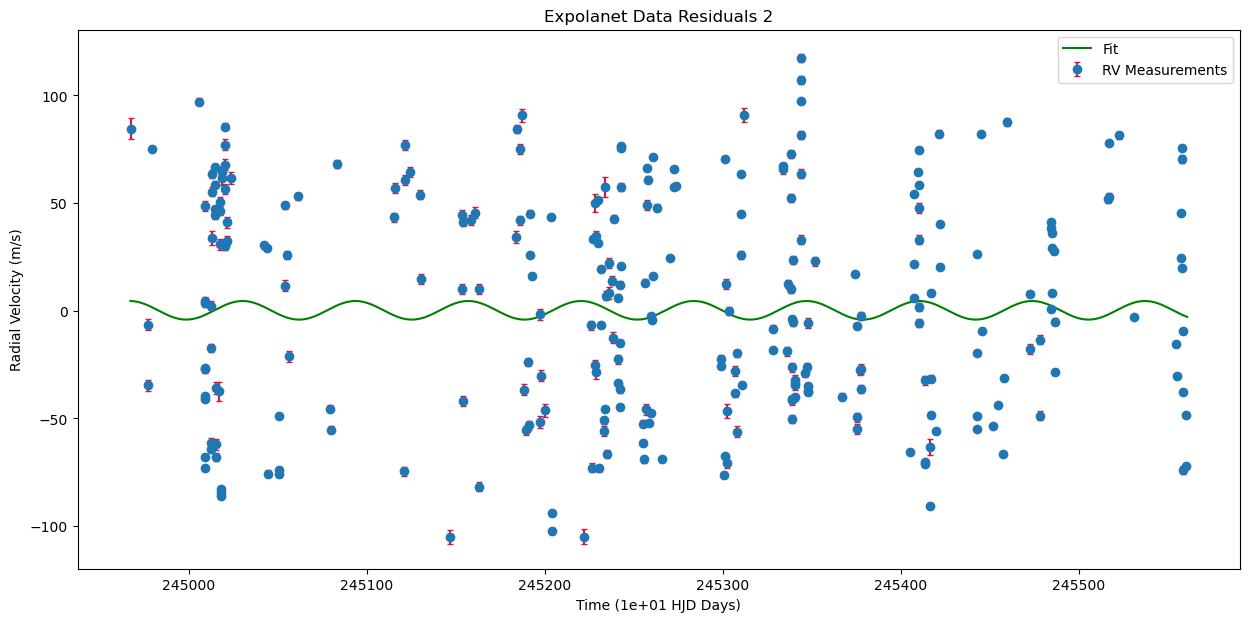

In [69]:
initial_guess = [71, 1, 60, 1]

#curve fit
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, residuals4, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess,
                                        )
    
print(f"Fitted params: {params}")

params4 = params

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = f_curve(x_fit, *params4)    
                                    

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=residuals4, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 2")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

Fitted params: [ 4.32111780e+00 -1.38836814e+04  6.33932210e+01  2.26482052e-01]


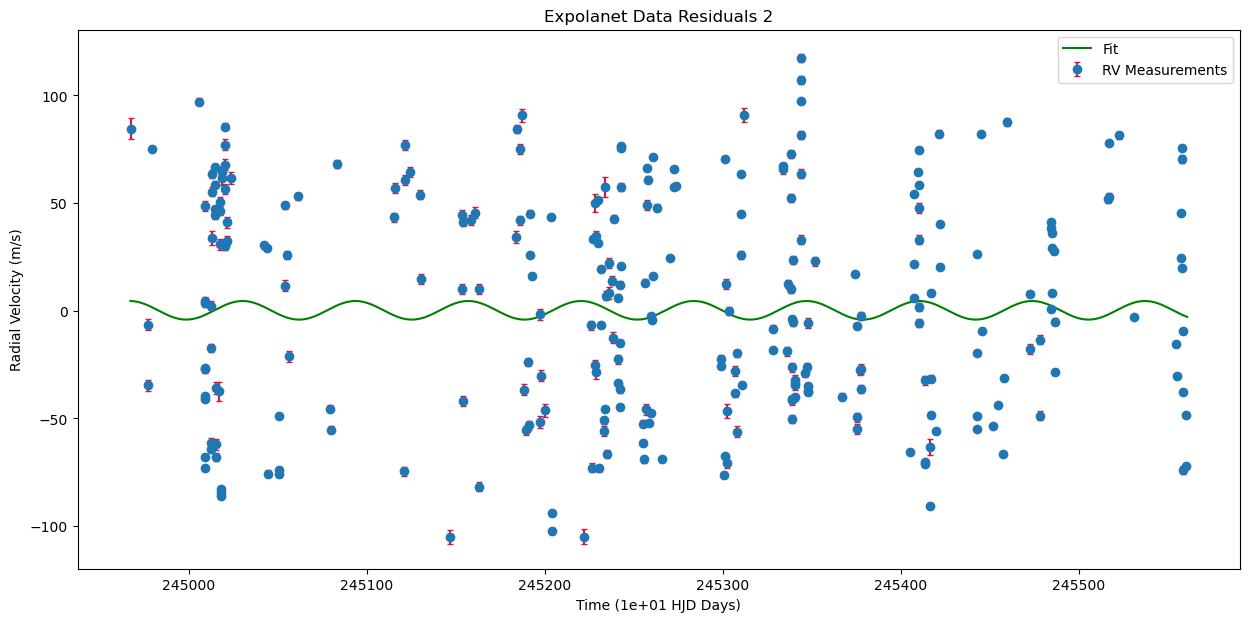

In [73]:
initial_guess = [71, 1, 60, 1]

#curve fit
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, residuals4, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess,
                                        )
    
print(f"Fitted params: {params}")

params5 = params

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = f_curve(x_fit, *params4)    
                                    

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=residuals4, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 2")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

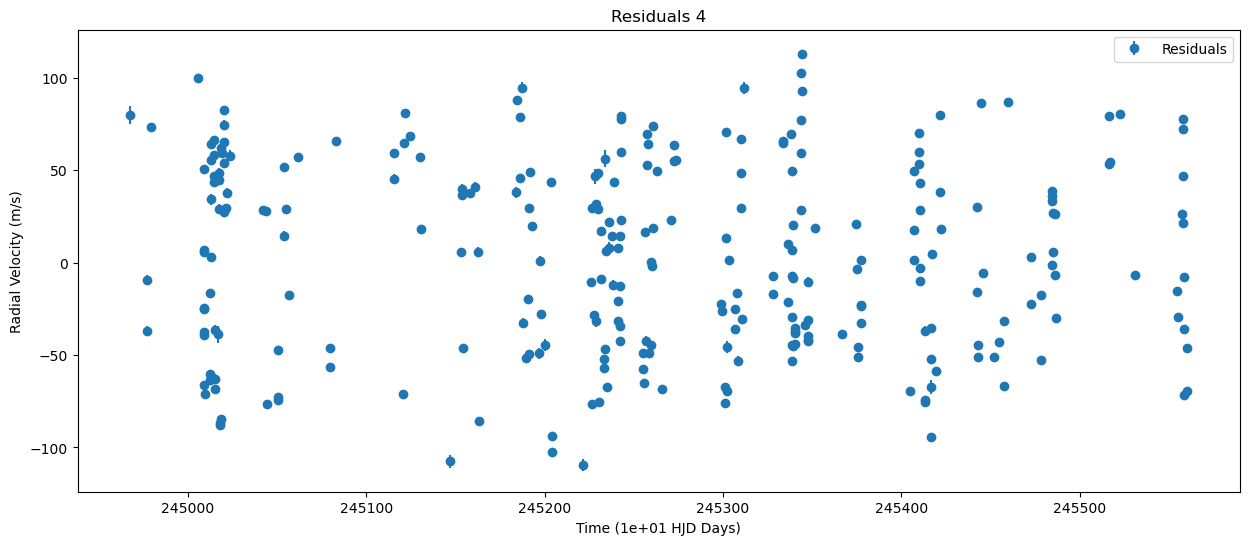

In [74]:
# calculate residual2
y_pred = f_curve(scaled_hjd, *params5)
residuals5 = residuals4 - y_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, residuals5, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals 4")
plt.legend(frameon=True,fontsize=10,handletextpad=1)
plt.show()

In [76]:
residuals_mean = np.mean(residuals5)
residuals_std = np.std(residuals5)
residuals_rms = np.sqrt(np.mean(residuals5**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  2.1114105881376948
Residuals stdev is 50.8708022460932838
Residuals RMS is   50.8708022460932838


## 5 Planets?

In [78]:
def five_sum(x,
            a1, b1, c1, d1,
            a2, b2, c2, d2,
            a3, b3, c3, d3,
            a4, b4, c4, d4,
            a5, b5, c5, d5
            ):
    sin1 = f_curve(x, a1, b1, c1, d1)
    sin2 = f_curve(x, a2, b2, c2, d2)
    sin3 = f_curve(x, a3, b3, c3, d3)
    sin4 = f_curve(x, a4, b4, c4, d4)
    sin5 = f_curve(x, a5, b5, c5, d5)
    return sin1 + sin2 + sin3 + sin4 + sin5

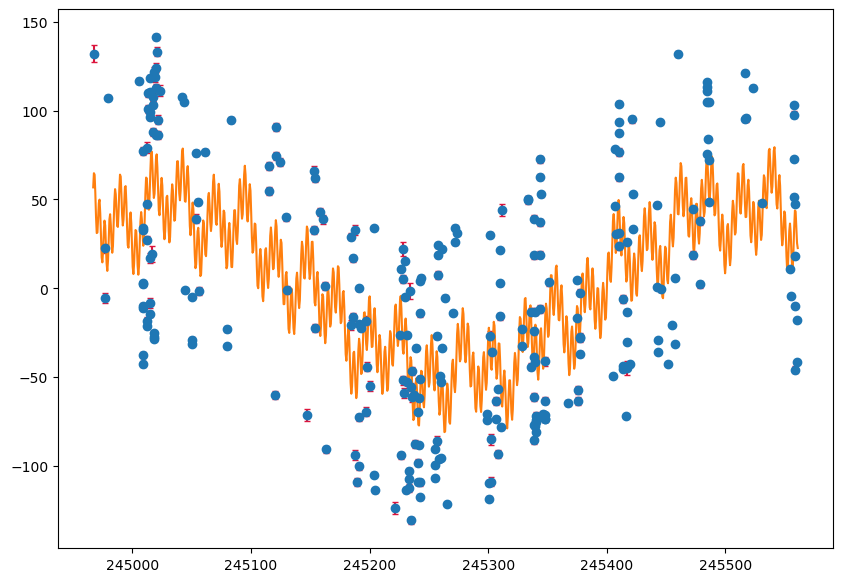

In [79]:
plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty,
            fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, five_sum(x_fit,
                            params1[0],
                            params1[1],
                            params1[2],
                            params1[3], 
                            params2[0],
                            params2[1],
                            params2[2],
                            params2[3], 
                            params3[0],
                            params3[1],
                            params3[2],
                            params3[3], 
                            params4[0],
                            params4[1],
                            params4[2],
                            params4[3],
                            params5[0],
                            params5[1],
                            params5[2],
                            params5[3], 
                            ))
plt.show()

In [80]:
final_initial_guess = np.concatenate((params1, params2, params3, params4, params5))

Fitted params: [ 5.01140763e+01 -2.95510554e+02  5.00412764e+02  1.24398642e+04
 -1.88392411e+01 -5.90689956e+03  2.66260804e+01  9.00451961e+03
 -1.39636014e+01  1.25801105e+03  4.37746332e+00  8.93565299e+03
  1.73073431e+03 -1.97316519e+02  6.00313659e+01 -4.36087160e+04
  1.72745141e+03  3.88174744e+01  5.99809681e+01  1.32331264e+04]


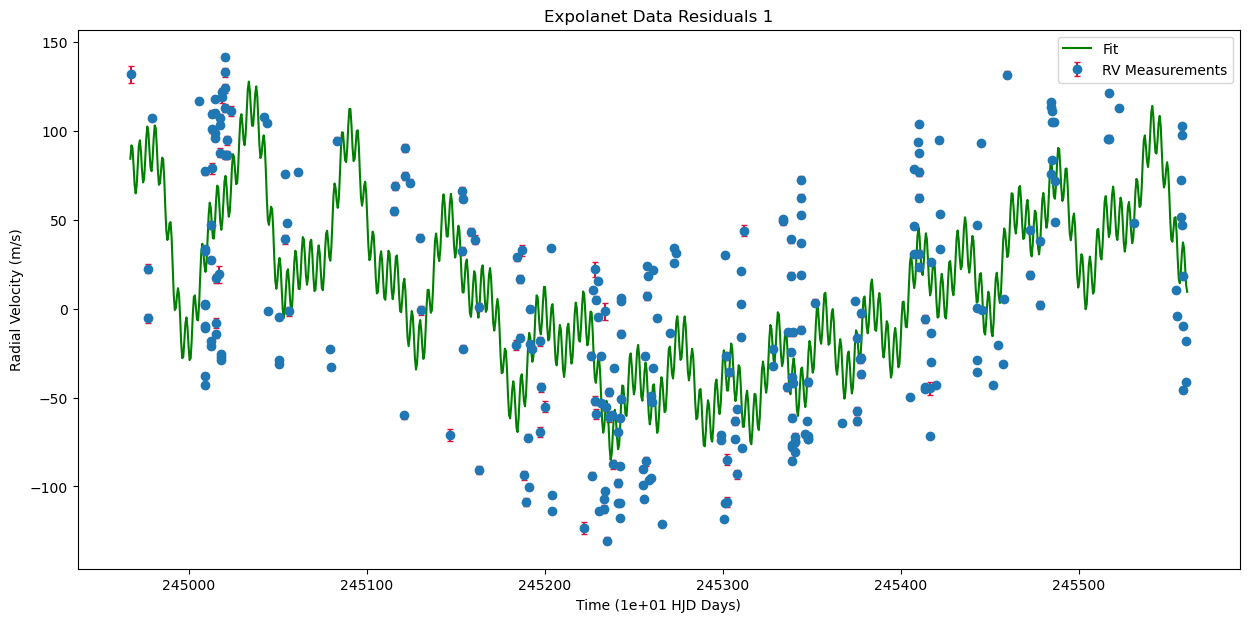

In [82]:
# initial_guess = [15, 1, 180, 1]

# lower_bound = [20, -np.inf, 0, -np.inf]
# upper_bound = [30, np.inf, 10, np.inf]

#curve fit
params, params_cov = optimize.curve_fit(five_sum, scaled_hjd, radial_velocity, sigma = uncertainty, absolute_sigma=True,
                                        p0=final_initial_guess,
                                        # bounds = (lower_bound, upper_bound)
                                        )
    
print(f"Fitted params: {params}")

# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = five_sum(x_fit, *params)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 1")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

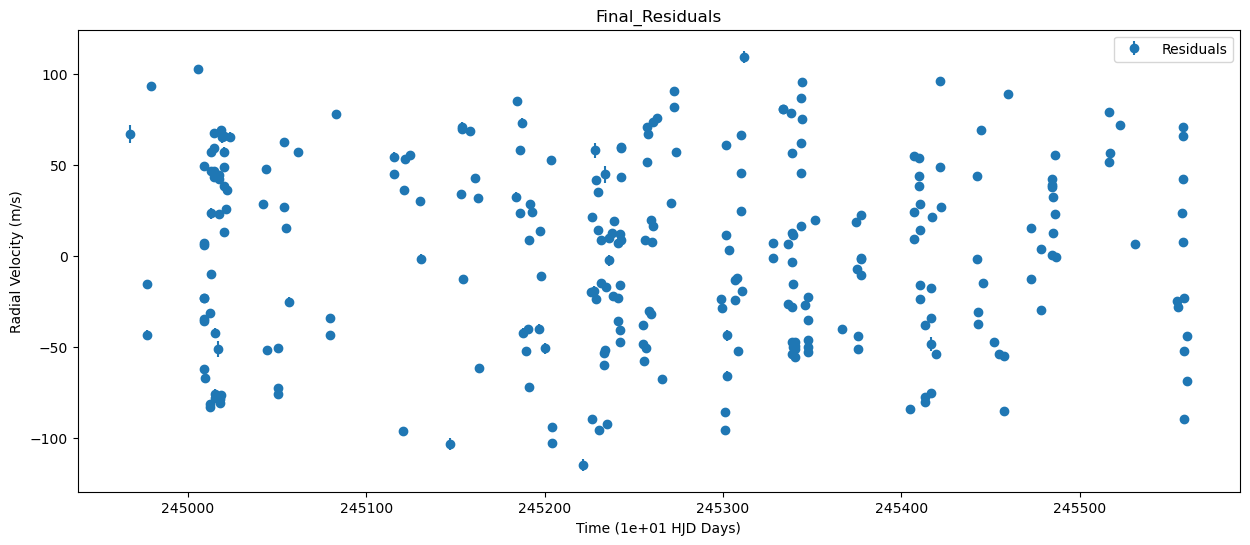

In [83]:
# calculate residual2
final_pred = five_sum(scaled_hjd, *final_initial_guess)
final_residuals = radial_velocity - final_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, final_residuals, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Final_Residuals")
plt.legend(frameon=True,fontsize=10,handletextpad=1)
plt.show()

In [84]:
residuals_mean = np.mean(final_residuals)
residuals_std = np.std(final_residuals)
residuals_rms = np.sqrt(np.mean(final_residuals**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.5316311151972213
Residuals stdev is 51.0031672199336228
Residuals RMS is   51.0031672199336228


In [85]:
def gaussian(x,mu,s):
    return 1./np.sqrt(2.0*np.pi*s**2) * np.exp(-0.5*((x-mu)/s)**2)

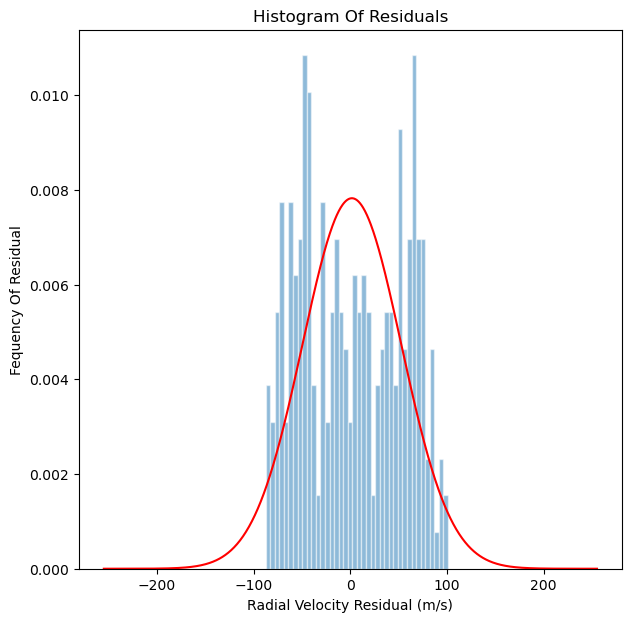

In [86]:
f,ax = plt.subplots(1,1,figsize=(7,7))

counts, bins_custom = np.histogram(residuals,bins=40)
ax.hist(residuals,bins=bins_custom,alpha=0.5,edgecolor="white",density=True)

# draw the gaussian function based on mean and stdev of residuals
x_g = np.linspace(-5*residuals_std,5*residuals_std,1000)
ax.plot(x_g,gaussian(x_g,residuals_mean,residuals_std),color="red")

ax.set_xlabel('Radial Velocity Residual (m/s)')
ax.set_ylabel('Fequency Of Residual')
ax.set_title('Histogram Of Residuals')

plt.show()

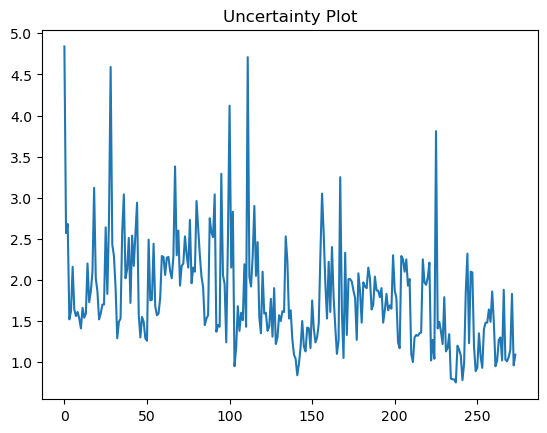

Mean Uncertainty: 1.8060667343065693
Stdev Uncertainty: 0.6427887768668138
Uncertainty RMS is   1.917043155600502


In [ ]:
# calculate experimental error
plt.plot(uncertainty)
plt.title("Uncertainty Plot")
plt.show()

uncertainty_mean = np.mean(uncertainty)
uncertainty_std = np.std(uncertainty)
uncertainty_rms = np.sqrt(np.mean(uncertainty**2))

print(f"Mean Uncertainty: {uncertainty_mean}")
print(f"Stdev Uncertainty: {uncertainty_std}")
print(f"Uncertainty RMS is   {uncertainty_rms}")